In [1]:
import pandas as pd
import cv2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import copy as cp
import numpy as np
import math
from keras.models import load_model


Using TensorFlow backend.


In [2]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}


count_dict ={'A':920,'B':920,'C':920,'D':920,'E':920,'F':920,'G':920,'H':920,'I':920,'J':920,'K':910,'L':920,'M':920,
                   'N':920,'O':914,'P':920,'Q':920,'R':920,'S':920,'T':920,'U':920,'V':920,'W':920,'X':920,'Y':920,
                   'Z':920,'space':920,'del':920,'nothing':920}


images = []
labels = []
size = 100,100


In [54]:
model = load_model('model_edged.h5')

3
A


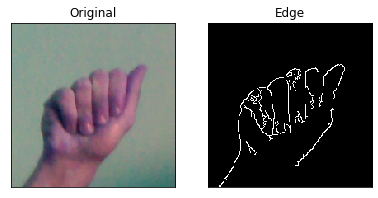

In [4]:


images = []
labels = []
size = 100,100


#reading
img = cv2.imread('test\\orig_sample\\a.jpg')

print(img.shape[2])

if(img.shape[2]==3):

    #conv to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    # noise reduction
    blured = cv2.GaussianBlur(gray, (5, 5), 0)
    blured = cv2.erode(blured, None, iterations=2)
    blured = cv2.dilate(blured, None, iterations=2)

    high_thresh, thresh_im = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    high_thresh2=high_thresh*0.5
    low_thresh = 0.1*high_thresh


    edged=cv2.Canny(img,200,20)
    model_image =~edged
    model_image = cv2.resize(model_image,dsize=(100,100),interpolation=cv2.INTER_CUBIC)

if(img.shape[2]==1):

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    edged=img
    model_image=~edged
    model_image = cv2.resize(model_edged,dsize=(img_size, img_size),interpolation=cv2.INTER_CUBIC)



images.append(model_image)


images=np.asarray(images)
images = images.astype('float32')/255.0

X_test=images

X_test = X_test.reshape(X_test.shape + (1,))

plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edged,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])




predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
labe=chr(65+predictions)

print(labe)

In [121]:
def getlabel(img):

    images = []

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blured = cv2.GaussianBlur(gray, (5, 5), 0)
    blured = cv2.erode(blured, None, iterations=2)
    blured = cv2.dilate(blured, None, iterations=2)

    high_thresh, thresh_im = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    high_thresh2=high_thresh*0.5
    low_thresh = 0.1*high_thresh
    edged=~img

    edged=cv2.Canny(edged,200,20)
    model_image =~edged
    model_image = cv2.resize(model_image,dsize=(100,100),interpolation=cv2.INTER_CUBIC)




    images.append(model_image)


    images=np.asarray(images)
    images = images.astype('float32')/255.0

    X_test=images

    X_test = X_test.reshape(X_test.shape + (1,))






    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    if(predictions==28):
            labe='space'
    elif(predictions==26):
            labe='del'
    elif(predictions==27):
            labe='nothing'
    else:        
        labe=chr(65+predictions)
    

    return labe

In [123]:

for i in count_dict:
    predictions=[]
    for j in range(0,count_dict[i]):
        img = cv2.imread('train\\'+i+'\\'+str(j)+'.jpg')
        predictions.append(getlabel(img))
    
    countr=0
    for k in predictions:
        if (k==i):
            countr+=1
    print (str(i)+'-'+str(i)+'-'+str(count_dict[i]-1))
    print(countr)
    
    
        


A-A-919
919
B-B-919
920
C-C-919
920
D-D-919
918
E-E-919
917
F-F-919
915
G-G-919
908
H-H-919
918
I-I-919
919
J-J-919
920
K-K-909
910
L-L-919
920
M-M-919
897
N-N-919
900
O-O-913
913
P-P-919
917
Q-Q-919
920
R-R-919
919
S-S-919
917
T-T-919
913
U-U-919
913
V-V-919
917
W-W-919
914
X-X-919
910
Y-Y-919
920
Z-Z-919
920
space-space-919
920
del-del-919
920
nothing-nothing-919
920


nothing


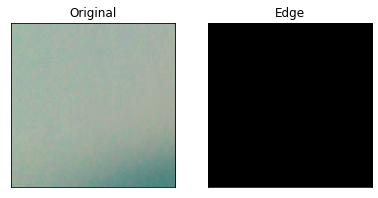

In [120]:
img = cv2.imread('test\\orig_sample\\nothing.jpg')
print(getlabel(img))

In [ ]:
def getlabel(img):

    images = []

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blured = cv2.GaussianBlur(gray, (5, 5), 0)
    blured = cv2.erode(blured, None, iterations=2)
    blured = cv2.dilate(blured, None, iterations=2)

    high_thresh, thresh_im = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    high_thresh2=high_thresh*0.5
    low_thresh = 0.1*high_thresh
    edged=~img

    edged=cv2.Canny(edged,200,20)
    model_image =~edged
    model_image = cv2.resize(model_image,dsize=(100,100),interpolation=cv2.INTER_CUBIC)




    images.append(model_image)


    images=np.asarray(images)
    images = images.astype('float32')/255.0

    X_test=images

    X_test = X_test.reshape(X_test.shape + (1,))


    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    
    if(predictions==28):
            labe='space'
    elif(predictions==26):
            labe='del'
    elif(predictions==27):
            labe='nothing'
    else:        
        labe=chr(65+predictions)
    

    return labe